<h2 style='color: darkmagenta; font-weight: bold;'> The following activities were performed to accomplish this research project: </h2>

<hr style='border: 1px solid darkorchid;'>
<h3>Data Modeling</h3>
<ul style="line-height:33px">
The layouts of CSV files were checked to understand how should be the entities structure:
      <li style="line-height:25px; text-align:justify">tables names;</li>
      <li style="line-height:25px; text-align:justify">fields names;</li>
      <li style="line-height:25px; text-align:justify">datatypes; </li>
      <li style="line-height:25px; text-align:justify">sizes;</li>
      <li style="line-height:25px; text-align:justify">primary keys;</li>
      <li style="line-height:25px; text-align:justify">foreign keys;</li>
      <li style="line-height:25px; text-align:justify">tables relationships.</li>
</ul>
<h3>Data Engineering</h3>
<ul style="line-height:33px">
      <li style="line-height:25px; text-align:justify">The information collected on the step above was the base to create a graphical presentation of entities and their relationships, that means the Entity-Relationship Diagram (ERD). The image has been saved on ERD_EmployeesDB.png file;</li>
      <li style="line-height:25px; text-align:justify">A new physical database was created and named employeeDB;</li>
      <li style="line-height:25px; text-align:justify">The SQL schema was extracted from the tool used to design the ERD and stored in a file named schema.sql;</li>
      <li style="line-height:25px; text-align:justify">The SQL schema was adjusted to drop all tables if they exist and also to import all CSV files in batch mode, better than manually import one by one;</li>
      <li style="line-height:25px; text-align:justify">In the end, the SQL script was able to recreate the database structure and import the files in one shot, without any error.</li>
</ul>
<h3>Data Analysis</h3>
<ul style="line-height:33px">
      <li style="line-height:25px; text-align:justify">One SQL script was created to store all queries required to the data analysis (DataAnalysis.sql);</li>
      <li style="line-height:25px; text-align:justify">During the analysis, something incoherent was detected between the salaries amount and the titles (or job position). The average salary of Engineer, Senior Engineer, and Assistant Engineer are pratically the same. A similar situation was found for Staff and Senior Staff, considering that these two positions have the highest average salaries in the company. Due to this intriguing discovery, a jupyter notebook with a bar chart of average salary by title was made to present to the chief.</li>
</ul>
<hr style='border: 1px solid darkorchid;'>

In [1]:
# Import dependencies
import matplotlib
import pandas as pd
from sqlalchemy import create_engine
from dbconfig import dialect, dbname, dbuser, psswd, host, port
from matplotlib import style
style.use('Solarize_Light2')
import matplotlib.pyplot as plt

In [2]:
# string to connect postgresql.
connection_string = dialect + '://' + dbuser + ':' + psswd + '@' + host + ':' + str(port) + '/' + dbname
# Connecting to database.
engine = create_engine(connection_string)

In [3]:
# Query to get the average of salary by title.
query = "SELECT tit.title, ROUND(AVG(sal.salary),2) AS avg_salary "   
query +="FROM titles tit "  
query +="INNER JOIN salaries sal ON (tit.emp_no = sal.emp_no) "  
query +="GROUP BY tit.title "
query +="ORDER BY avg_salary"
df = pd.read_sql(query, engine)
df.head()

,title,avg_salary
0,Assistant Engineer,48493.20
1,Senior Engineer,48506.75
2,Engineer,48539.78
3,Technique Leader,48580.51
4,Manager,51531.04


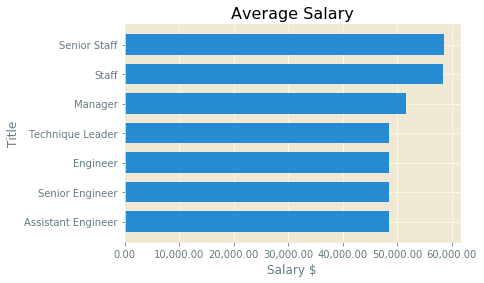

In [4]:
# Plot the bar chart of Average Salary X Title
fig, ax = plt.subplots()
rank = range(1, len(df['avg_salary'])+1)
ax.barh(rank, df['avg_salary'], height=0.7)
ax.set_xlabel("Salary $")
ax.set_ylabel("Title")
ax.set_yticks(rank)
ax.set_yticklabels(df['title'])
ax.set_xticklabels(['{:,.2f}'.format(int(x)) for x in ax.get_xticks().tolist()])
ax.set_title("Average Salary")
plt.show()